In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img=cv2.imread(".\dataset\yuzvendra_chahal\83b6573a8e.jpg")
img.shape

(273, 236, 3)

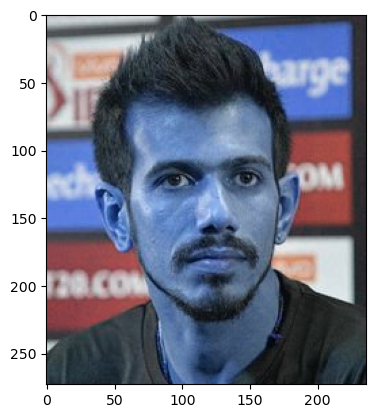

In [3]:
plt.imshow(img)

In [4]:
gray =cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(273, 236)

In [5]:
gray

array([[200, 200, 198, ...,  46,  47,  49],
       [199, 199, 199, ...,  49,  49,  49],
       [201, 201, 201, ...,  51,  50,  48],
       ...,
       [ 78,  68,  55, ...,  22,  40,  50],
       [ 75,  65,  52, ...,  27,  48,  56],
       [ 70,  61,  55, ...,  35,  44,  39]], dtype=uint8)

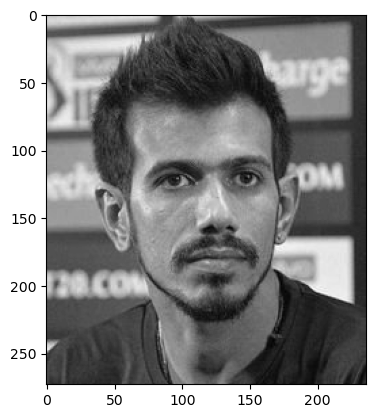

In [6]:
plt.imshow(gray,cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 57,  70, 136, 136]])

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(57, 70, 136, 136)

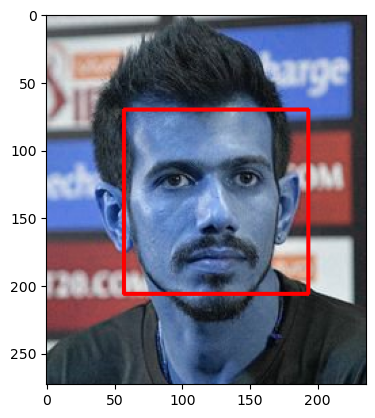

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

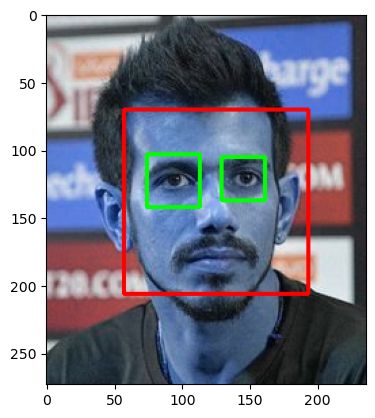

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

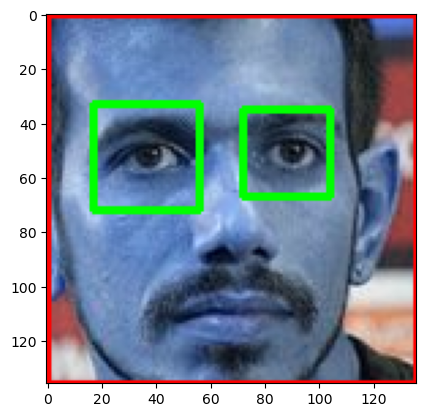

In [11]:
%matplotlib inline
plt.imshow(roi_color,cmap='gray')

In [12]:
cropped_img = np.array(roi_color)
cropped_img.shape

(136, 136, 3)

In [13]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

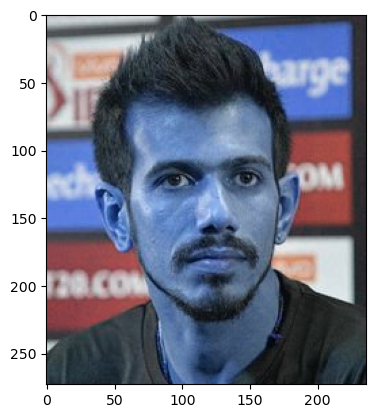

In [14]:
original_image = cv2.imread('.\dataset\yuzvendra_chahal\83b6573a8e.jpg')
plt.imshow(original_image)

In [21]:
path_to_data = "./dataset/"
path_to_cr_data = "./cropped/"

In [22]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [23]:
img_dirs

['./dataset/bhuvneshwar_kumar',
 './dataset/dinesh_karthik',
 './dataset/hardik_pandya',
 './dataset/jasprit_bumrah',
 './dataset/k._l._rahul',
 './dataset/kedar_jadhav',
 './dataset/kuldeep_yadav',
 './dataset/mohammed_shami',
 './dataset/ms_dhoni',
 './dataset/ravindra_jadeja',
 './dataset/rohit_sharma',
 './dataset/shikhar_dhawan',
 './dataset/vijay_shankar',
 './dataset/virat_kohli',
 './dataset/yuzvendra_chahal']

In [24]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [25]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./cropped/bhuvneshwar_kumar
Generating cropped images in folder:  ./cropped/dinesh_karthik
Generating cropped images in folder:  ./cropped/hardik_pandya
Generating cropped images in folder:  ./cropped/jasprit_bumrah
Generating cropped images in folder:  ./cropped/k._l._rahul
Generating cropped images in folder:  ./cropped/kedar_jadhav
Generating cropped images in folder:  ./cropped/kuldeep_yadav
Generating cropped images in folder:  ./cropped/mohammed_shami
Generating cropped images in folder:  ./cropped/ms_dhoni
Generating cropped images in folder:  ./cropped/ravindra_jadeja
Generating cropped images in folder:  ./cropped/rohit_sharma
Generating cropped images in folder:  ./cropped/shikhar_dhawan
Generating cropped images in folder:  ./cropped/vijay_shankar
Generating cropped images in folder:  ./cropped/virat_kohli
Generating cropped images in folder:  ./cropped/yuzvendra_chahal


In [29]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    imArray =  np.float32(imArray)   
    imArray /= 255; 
    coeffs=pywt.wavedec2(imArray, mode, level=level)
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0; 
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)
    return imArray_H

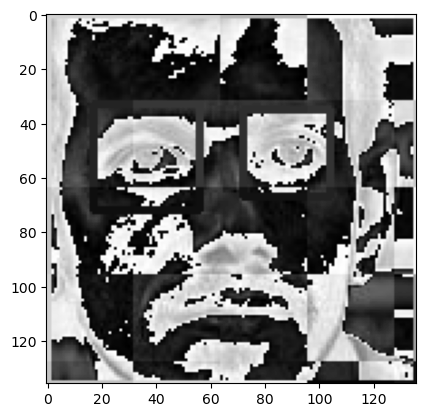

In [30]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [31]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'bhuvneshwar_kumar': ['./cropped/bhuvneshwar_kumar\\bhuvneshwar_kumar1.png',
  './cropped/bhuvneshwar_kumar\\bhuvneshwar_kumar10.png',
  './cropped/bhuvneshwar_kumar\\bhuvneshwar_kumar11.png',
  './cropped/bhuvneshwar_kumar\\bhuvneshwar_kumar12.png',
  './cropped/bhuvneshwar_kumar\\bhuvneshwar_kumar13.png',
  './cropped/bhuvneshwar_kumar\\bhuvneshwar_kumar2.png',
  './cropped/bhuvneshwar_kumar\\bhuvneshwar_kumar3.png',
  './cropped/bhuvneshwar_kumar\\bhuvneshwar_kumar4.png',
  './cropped/bhuvneshwar_kumar\\bhuvneshwar_kumar5.png',
  './cropped/bhuvneshwar_kumar\\bhuvneshwar_kumar7.png',
  './cropped/bhuvneshwar_kumar\\bhuvneshwar_kumar8.png',
  './cropped/bhuvneshwar_kumar\\bhuvneshwar_kumar9.png'],
 'dinesh_karthik': ['./cropped/dinesh_karthik\\dinesh_karthik1.png',
  './cropped/dinesh_karthik\\dinesh_karthik2.png',
  './cropped/dinesh_karthik\\dinesh_karthik4.png',
  './cropped/dinesh_karthik\\dinesh_karthik5.png',
  './cropped/dinesh_karthik\\dinesh_karthik6.png',
  './cropped/dine

In [32]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'bhuvneshwar_kumar': 0,
 'dinesh_karthik': 1,
 'hardik_pandya': 2,
 'jasprit_bumrah': 3,
 'k._l._rahul': 4,
 'kedar_jadhav': 5,
 'kuldeep_yadav': 6,
 'mohammed_shami': 7,
 'ms_dhoni': 8,
 'ravindra_jadeja': 9,
 'rohit_sharma': 10,
 'shikhar_dhawan': 11,
 'vijay_shankar': 12,
 'virat_kohli': 13,
 'yuzvendra_chahal': 14}

In [33]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])  

In [34]:
len(X[0])

4096

In [37]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(220, 4096)

In [36]:
X[0]

array([63., 69., 74., ..., 48., 79., 39.])

In [38]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


In [47]:
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=0)
pipe =Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel = 'linear',C=100))])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.43636363636363634

In [43]:
len(X_test)

55

In [45]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           4       0.14      0.50      0.22         2
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         1
           7       0.40      1.00      0.57         2
           8       0.25      1.00      0.40         3
           9       0.38      0.75      0.50         4
          10       0.67      0.29      0.40        14
          11       0.00      0.00      0.00         2
          12       1.00      0.33      0.50         3
          13       0.40      0.86      0.55         7
          14       0.00      0.00      0.00         1

    accuracy                           0.36        55
   macro avg       0.22      0.32      0.21        55
weighted avg       0.34   

C:\Users\dvaru\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dvaru\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dvaru\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [49]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [50]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Users\dvaru\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\dvaru\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\dvaru\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


,model,best_score,best_params
0,svm,0.418182,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.309091,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.484848,{'logisticregression__C': 5}


In [55]:
best_clf = best_estimators['logistic_regression']

In [56]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 2, 5, 4, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 5, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], dtype=int64)

In [58]:
class_dict

{'bhuvneshwar_kumar': 0,
 'dinesh_karthik': 1,
 'hardik_pandya': 2,
 'jasprit_bumrah': 3,
 'k._l._rahul': 4,
 'kedar_jadhav': 5,
 'kuldeep_yadav': 6,
 'mohammed_shami': 7,
 'ms_dhoni': 8,
 'ravindra_jadeja': 9,
 'rohit_sharma': 10,
 'shikhar_dhawan': 11,
 'vijay_shankar': 12,
 'virat_kohli': 13,
 'yuzvendra_chahal': 14}

In [59]:
!pip install joblib
import joblib 
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [60]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))